In [16]:
import CNN as CNN
import CNN_utilities as Utils

import torch 
from torch.utils.data import DataLoader


In [17]:
#NN parameters
num_files_load = 20
num_epochs = 50 

batch_size = 32
batch_sizelist = [4, 8, 16, 32, 64, 128]

learning_rate = 0.0001
learning_ratelist = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

weight_decay = 1e-4
weight_decaylist = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

#breakoff parameters
min_validation_loss = float('inf') #initializing validation loss
patience = float('inf')
min_delta = 0

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [18]:
#importing data

root_dir = r'/Users/boribbens/Documents/Universiteit_Utrecht/EP_Master/Semester_1/Computational_aspects_of_Machine_Learning/ML_Project/Datafolder/mock_data'
dataset = CNN.signal_dataset(root_dir=root_dir, num_files_load=num_files_load) # shape(10000,2,3,65536)-->(file, signal/label, telescope, time)

In [19]:
#Split into Train/Test

train_size = 0.7
validation_size = 0.2
test_size = 1 - (train_size + validation_size)

train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, validation_size, test_size])

#Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size = batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Training Epochs:   0%|                                                       | 0/50 [00:00<?, ?it/s]

Training Epochs: 100%|██████████████████████████████████████████████| 50/50 [00:55<00:00,  1.11s/it]



Evaluating on Test Data...
Test Loss: 0.6933, Test Accuracy: 0.5000


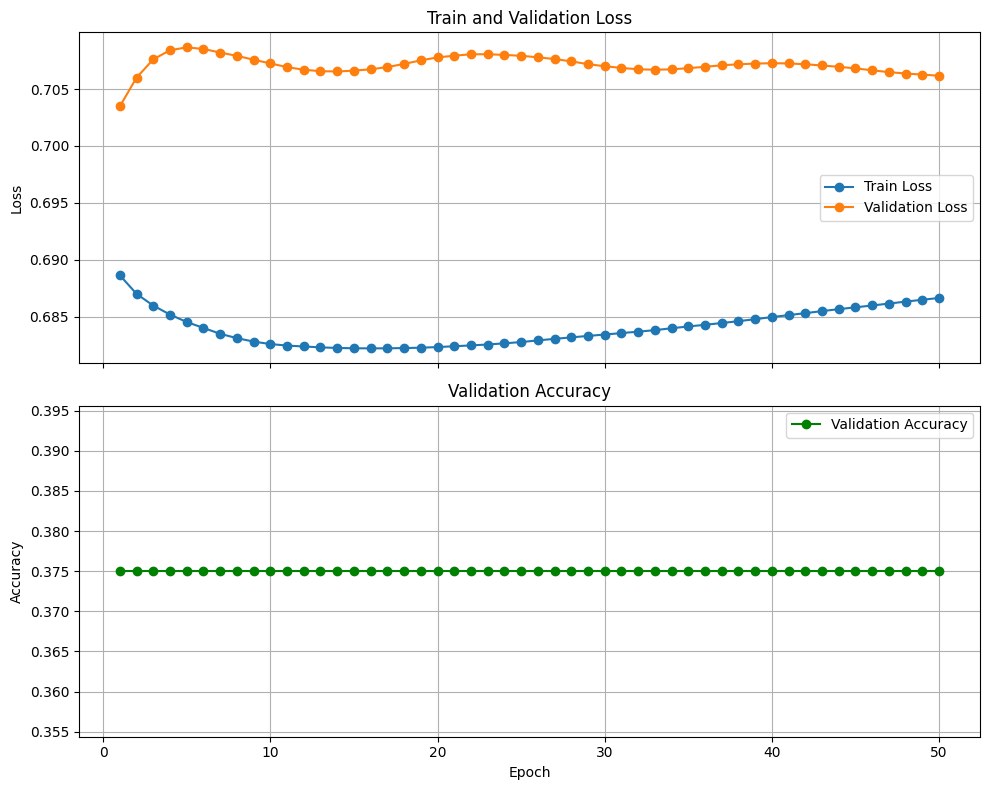

Training Epochs: 100%|██████████████████████████████████████████████| 50/50 [00:57<00:00,  1.15s/it]



Evaluating on Test Data...
Test Loss: 0.6747, Test Accuracy: 0.5000


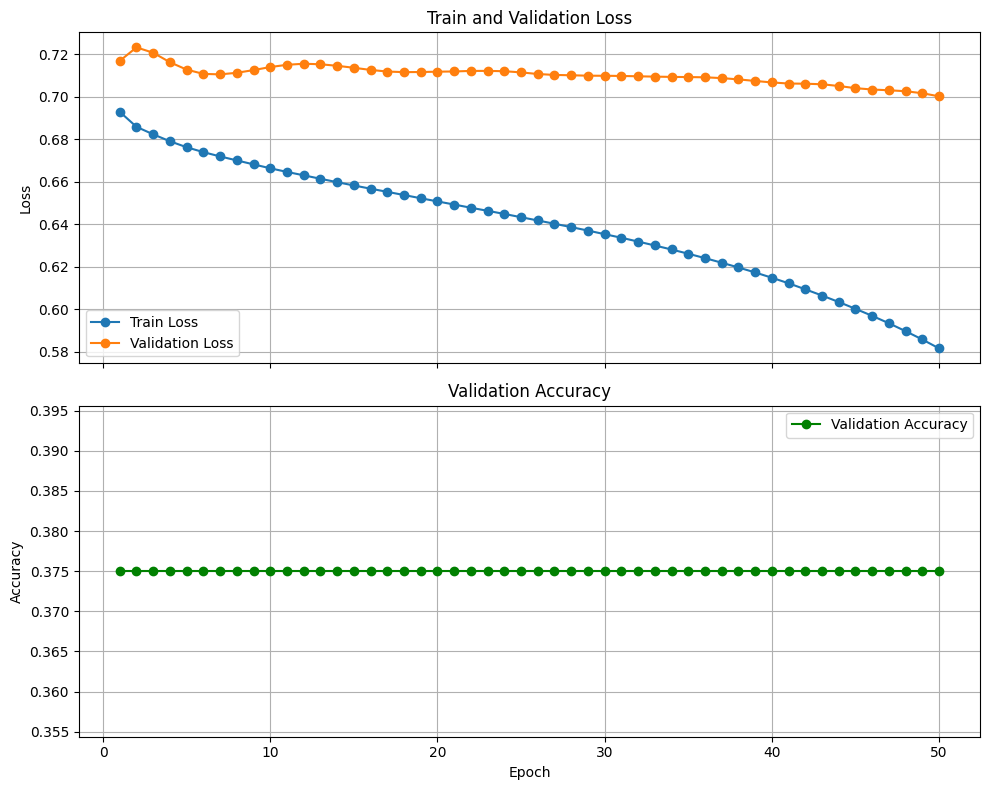

Training Epochs: 100%|██████████████████████████████████████████████| 50/50 [00:57<00:00,  1.15s/it]



Evaluating on Test Data...
Test Loss: 0.3377, Test Accuracy: 1.0000


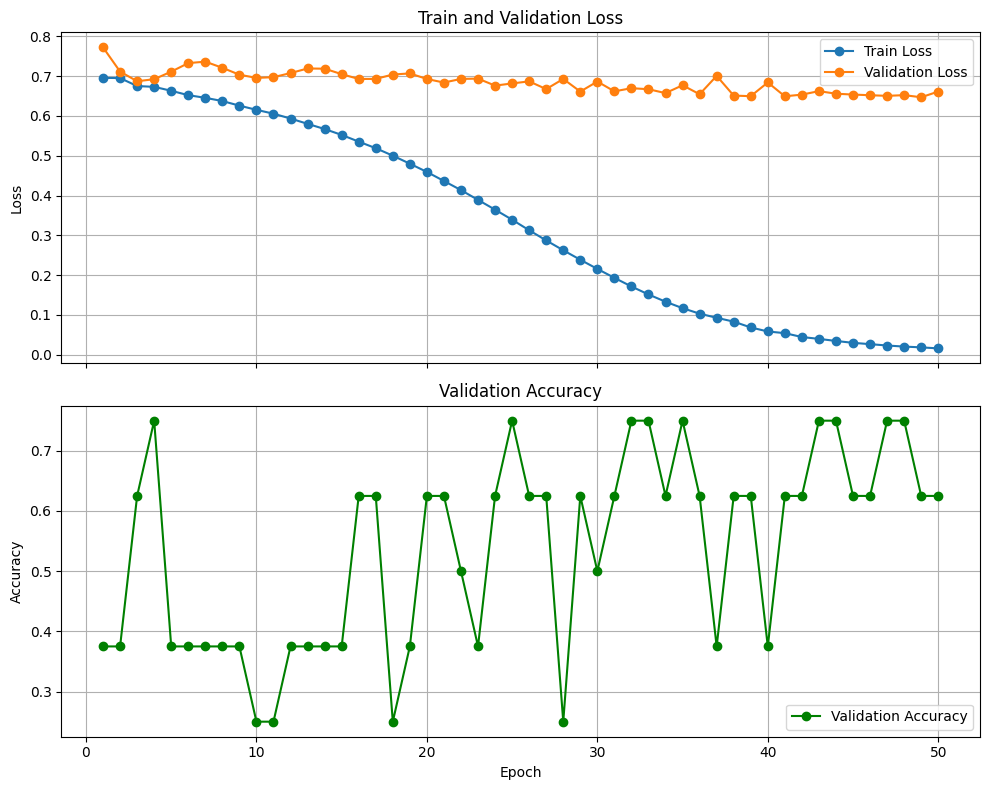

Training Epochs: 100%|██████████████████████████████████████████████| 50/50 [00:58<00:00,  1.18s/it]



Evaluating on Test Data...
Test Loss: 0.2770, Test Accuracy: 1.0000


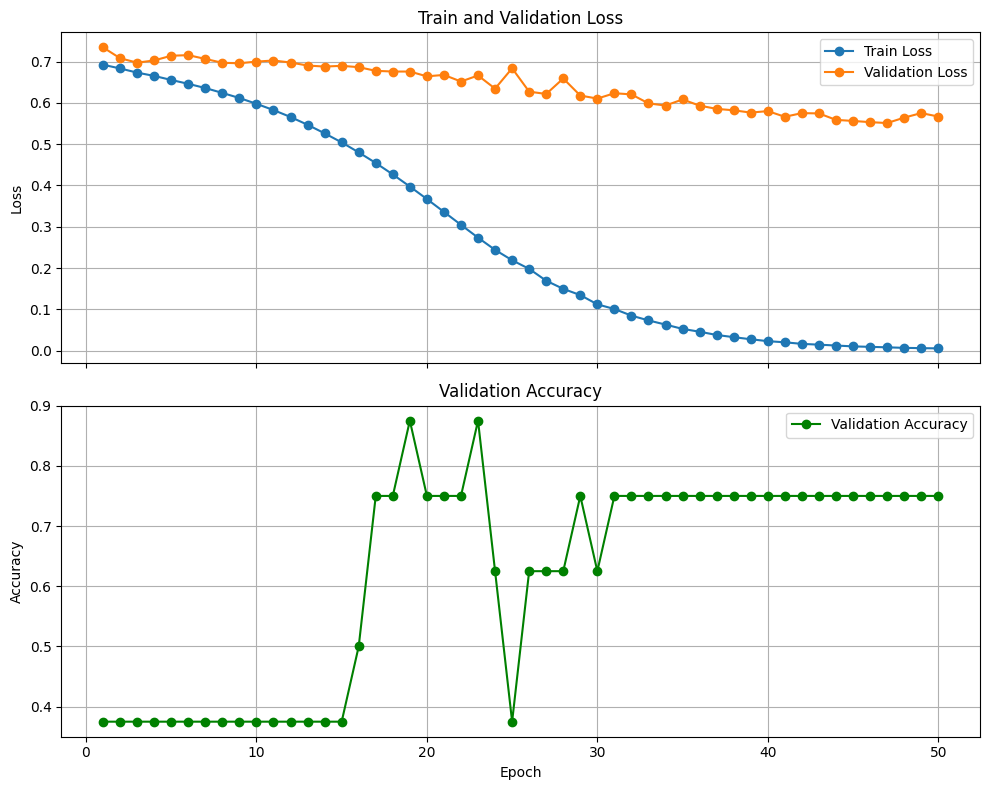

Training Epochs: 100%|██████████████████████████████████████████████| 50/50 [00:58<00:00,  1.17s/it]



Evaluating on Test Data...
Test Loss: 0.5516, Test Accuracy: 0.5000


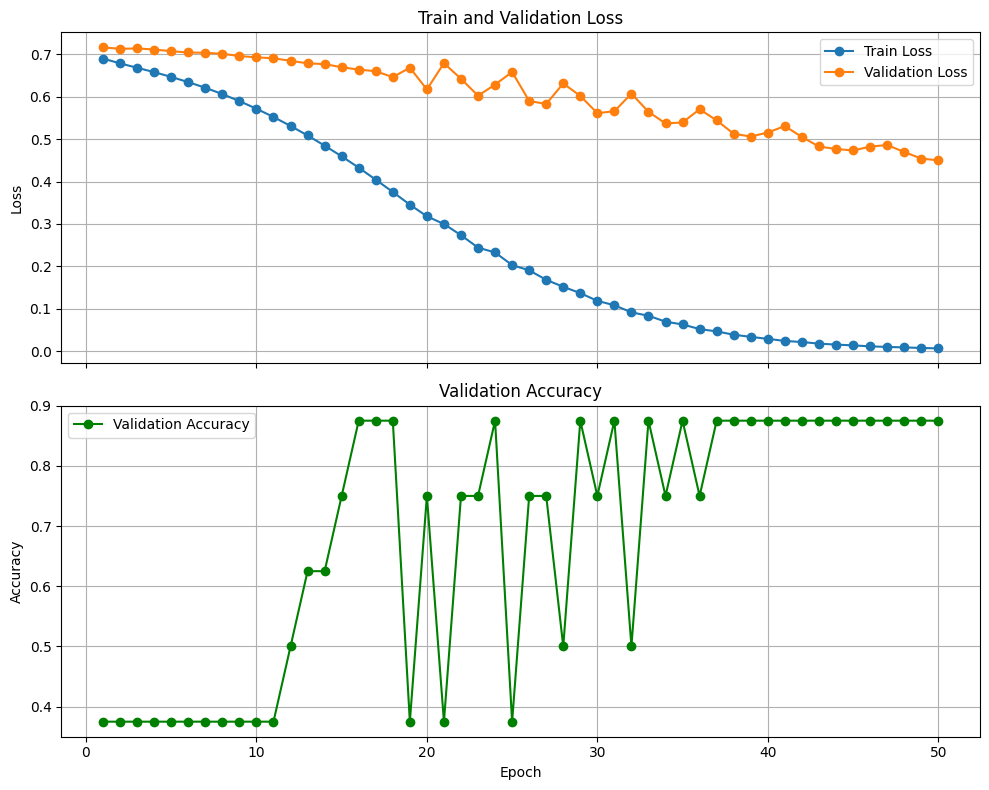

Training Epochs: 100%|██████████████████████████████████████████████| 50/50 [00:58<00:00,  1.16s/it]



Evaluating on Test Data...
Test Loss: 0.3991, Test Accuracy: 1.0000


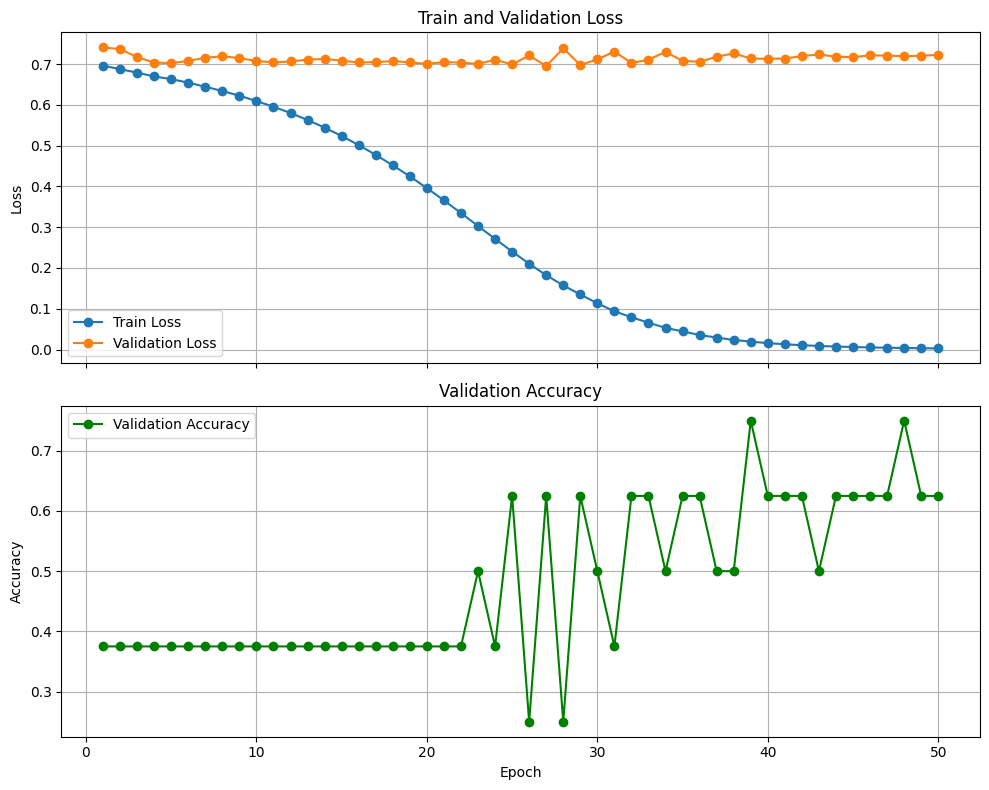

In [20]:
#Run the loop over the NN:

batch_size_optimizer = False
learning_rate_optimizer = False
weigth_decay_optimizer = True

if batch_size_optimizer:
    for batch_size_item in batch_sizelist:

        train_loader_item = DataLoader(train_dataset, batch_size=batch_size_item, shuffle=True)
        validation_loader_item = DataLoader(validation_dataset, batch_size = batch_size_item, shuffle=False)
        test_loader_item = DataLoader(test_dataset, batch_size=batch_size_item, shuffle=False)
        CNN.RunNeuralNetwork(train_loader_item, validation_loader_item, test_loader_item, learning_rate, weight_decay, num_epochs, patience, min_delta, Save=True, Name=f'batchsize{batch_size_item}_plot')
        

if learning_rate_optimizer:
    for learning_rate_item in learning_ratelist:
        CNN.RunNeuralNetwork(train_loader, validation_loader, test_loader, learning_rate_item, weight_decay, num_epochs, patience, min_delta, Save=True, Name=f'learningrate{learning_rate_item}_plot')

if weigth_decay_optimizer:
    for weight_decay_item in weight_decaylist:
        CNN.RunNeuralNetwork(train_loader, validation_loader, test_loader, learning_rate, weight_decay_item, num_epochs, patience, min_delta, Save=True, Name=f'weightdecay{weight_decay_item}_plot')


